## 解決過擬合問題有兩個主要選項：

### 1. 減少特徵的數量：
- 手動選擇要保留的特徵，哪些變數更為重要，哪些變數應該保留，哪些應該捨棄。 
- 使用模型選擇演算法，演算法會自動選擇哪些特徵變數保留，哪些捨棄。

缺點是捨棄了一些特徵以後，也就捨棄了一些問題的關鍵資訊。

### 2. 正規化
- 保留所有的特徵，但減少參數 $\theta_{j}$ 的大小或者減少量級。 
- 當有很多個特徵的時候，並且每個特徵都會對最終預測值產生影響，正規化可以保證運作良好。



正規化目的是儘量去簡化這個假設模型。因為這些參數都接近0的時候，越簡單的模型也被證明越不容易出現過擬合的問題。


減少一些數量級的特徵，加一些“懲罰”項(為了使代價函數最小，乘以 1000 就是懲罰)。

代價函數：

$$ \rm{CostFunction} = \rm{F}({\theta}) = \frac{1}{2m} \left [ \sum_{i = 1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^2 + \lambda \sum_{i = 1}^{m} \theta_{j}^{2} \right ]$$


$\lambda \sum_{i = 1}^{m} \theta_{j}^{2}$ 是正規化項，它縮小每個參數的值。 $\lambda$ 是正規化參數，$\lambda$ 控制兩個不同目標之間的取捨，即更好的去擬合訓練集的目標 和 將參數控制的更小的目標，從而保持假設模型的相對簡單，避免出現過擬合的情況。

但是如果選擇的 $\lambda $ 太大，可能會過多地消除特徵，導致 $\theta$ 都約等於 0 了，最終預測函數變成了直線了。這就變成了欠擬合。


# 羅吉斯迴歸的L1-正規化路徑

本操作實例會載入鳶尾花(Iris)資料集，其目標包含三種不同的鳶尾花品種（setosa、versicolor、virginica），儲存為150 * 4的numpy.ndarray，其4個特徵欄位如下：
1. 花萼長度（petal length） 
2. 花萼寬度（petal width） 
3. 花瓣長度（sepal length） 
4. 花瓣寬度（sepal width）

此一操作實例在源自鳶尾花資料集的二元分類問題上訓練L1懲罰的羅吉斯迴歸模型，這些模型按從最強正規化到最小正規化的順序排列，收集模型的4個係數並將其繪製為“正規化路徑”：在圖的左側（強正規化器），所有係數正好為0。當正規化變得越來越寬鬆時，係數可能會一個接一個變為非零值。

在這裡，我們選擇liblinear求解器，因為它可以有效地優化羅吉斯迴歸損失，並且具有非平滑，稀疏性導致l1損失。

還要注意，我們為誤差設置了一個較低的值，以確保在收集係數之前模型已經收斂。

我們還使用warm_start = True，這意味著將重新使用模型的係數來初始化下一個適合的模型，從而加快全路徑的計算速度。


In [1]:
# 導入所需套件
%matplotlib inline
print(__doc__)
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model

from sklearn.svm import l1_min_c

Automatically created module for IPython interactive environment


In [2]:
# 載入鳶尾花資料集與處理資料
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X /= X.max()  # 標準化X以加快收斂

Computing regularization path ...
This took 0.183s


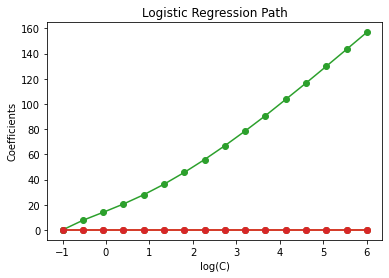

In [3]:
# 建立羅吉斯迴歸模型以展示path functions
cs = l1_min_c(X, y, loss='log') * np.logspace(0, 7, 16)
print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()